In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import entropy
import numpy as np 

### Characterization of database

In [17]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])

In [18]:
# Head
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


In [19]:
# Number of times that an user share an url
print(f'Number of sharing events = {data.shape[0]}')

Number of sharing events = 1037812


In [20]:
print(f"Number of unique news = {data.drop_duplicates(subset=['url_expanded']).shape[0]}")

Number of unique news = 67369


In [21]:
print(f"Number of unique users = {data.drop_duplicates(subset=['usr_id']).shape[0]}")

Number of unique users = 124015


In [22]:
print(f"Number of unique media outlet = {data.drop_duplicates(subset=['medio']).shape[0]}")

Number of unique media outlet = 19


### Some plots

In [23]:
# Distribution of unique news
dist_unique_news = data.drop_duplicates(subset='url_expanded').groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [24]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_unique_news.tolist(), base = 2))
print(effective_number_of_media)

14.0


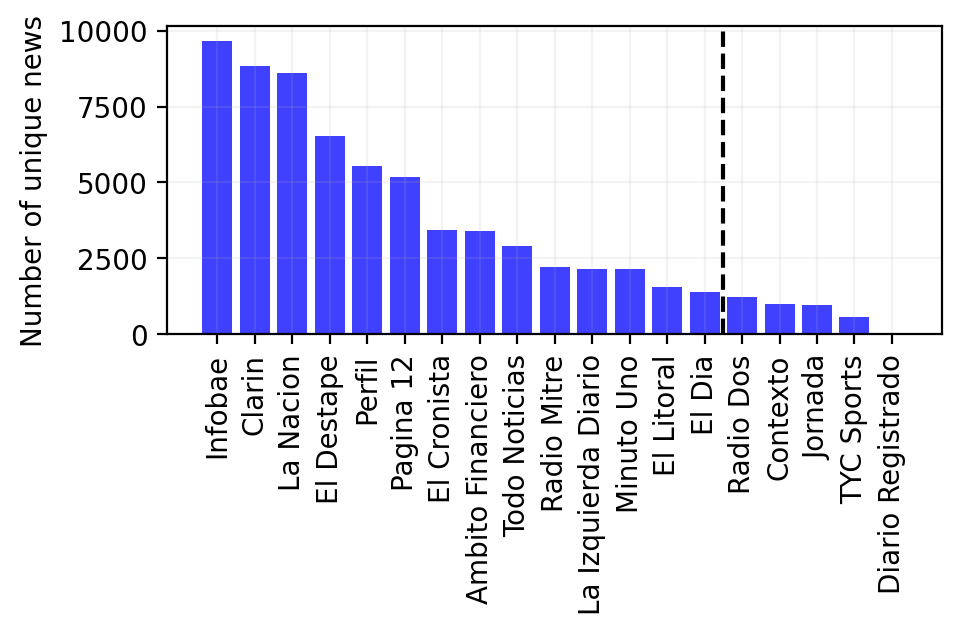

In [26]:
plt.figure(dpi = 200, figsize=(5,2))
plt.bar(range(dist_unique_news.shape[0]), dist_unique_news.to_list(), color = 'b', alpha = 0.75)
plt.xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 10)
plt.ylabel('Number of unique news')
plt.grid(True, alpha = 0.15)
plt.show()

In [27]:
# Distribution of sharing news
dist_sharing_news = data.groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [28]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_sharing_news.tolist(), base = 2))
print(effective_number_of_media)

9.0


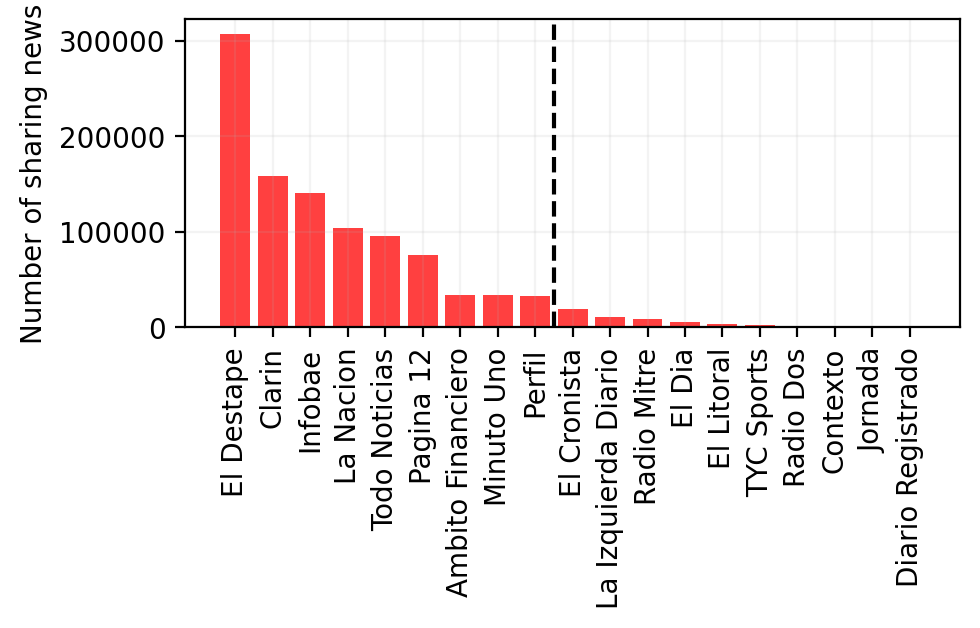

In [29]:
plt.figure(dpi = 200, figsize=(5,2))
plt.bar(range(dist_sharing_news.shape[0]), dist_sharing_news.to_list(), color = 'r', alpha = 0.75)
plt.xticks(range(dist_sharing_news.shape[0]), dist_sharing_news.index, rotation = 90)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 10)
plt.ylabel('Number of sharing news')
plt.grid(True, alpha = 0.15)
plt.show()